Housing price prediction using
Linear Regression

In [18]:
#importing packages...
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectKBest
from sklearn.decomposition import PCA
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
#importing dataset....
data_set=pd.read_csv("train_housing prices.csv")
df=pd.DataFrame(data_set)
#print(df)

In [19]:
print('A look at the data')
print(df.head(),'\n')

print ('Number of columns and rows of the data ')
print(df.shape,'\n')

print ('Description of the data')
print(df.describe(),'\n')

print ('Types of data values')
print(df.dtypes, '\n')

#identify nans
def num_missing(x):
    return sum(x.isnull())
#Applying per column:
print ("Missing values per column:")
print (df.apply(num_missing, axis=0),'\n') 

A look at the data
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature MiscVal  \
0         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
1         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
2         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
3         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
4         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0

In [20]:
#Handling Nans
values={'LotFrontage':0,'Alley':'No_alley','MasVnrType':'No_veneer','MasVnrArea':0,'FireplaceQu':'No_fireplace','GarageType':'No_garage','GarageYrBlt':0,'GarageFinish':'No_finish','GarageQual':'No_qual','GarageCond':'No_cond','PoolQC':'No_pool','Fence':'No_fence','MiscFeature':'No_misc','BsmtFinType2':'No_basement','BsmtFinType1':'No_basement','BsmtExposure':'No_Basement','BsmtCond':'No_Basement','BsmtQual':'No_basement','HasPool':0,'Electrical':'No'}
df2=df.fillna(value=values)
#print(df2)

# print ('Types of data values')
# print(df2.dtypes, '\n')

In [21]:
#Converting categorical values to numerical values using label encoder
le=LabelEncoder()
# Iterating over all the common columns in train and test
for col in df2.columns.values:
    #print(col)
       # Encoding only categorical variables
    if df2[col].dtypes=='object':
       # Using whole data to form an exhaustive list of levels
        data=df2[col].append(df2[col])
        le.fit(data.values)
        df2[col]=le.transform(df2[col])
#print(df2)

In [22]:
#Trying VarienceThreshold() for removing 0 varience features
# sel = VarianceThreshold()
# df3=sel.fit_transform(df2)
# #print(df3)
# print(df3.shape)
# #no 0 varience features

In [23]:
#Seperating the target variable
#print(df2)
array=df2.values
#the dataset without the  column: 'y'
X=array[:,0:80]
# print("X")
# print(X)
#the target column: y
Y=array[:,80]
# print("Y")
# print(Y)

In [24]:
# Trying principal component analysis
# ipca =PCA(n_components=20)
# ipca.fit(X)
# X=ipca.transform(X) 
# print(X.shape)
# PCA is reducing regression score

In [25]:
#Splitting train and test data using stratified split
X_train, X_test, Y_train, Y_test = train_test_split(X , Y, test_size=0.3, random_state = 2000)
# print(X_train.shape)
# print(Y_train.shape)
# print(X_test.shape)
# print(Y_test.shape)

In [26]:
#Standardization
scaler = StandardScaler()
scaler.fit(X_train)  
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

***Linear Regression...***
Training accuracy: 86.96633760864523 %
Regression score: 78.16786249944468 %
Predicted price for test data [172871.79115876 193547.79115876 118595.79115876 246007.79115876
 136115.79115876 209123.79115876 136319.79115876 129847.79115876
 138363.79115876 143871.79115876 190783.79115876  84535.79115876
 172851.79115876 119631.79115876  65673.79115876 147111.79115876
 288319.79115876 203207.79115876 149551.79115876  74899.79115876
 189611.79115876 138981.79115876 204919.79115876 106783.79115876
  87651.79115876  86335.79115876 134007.79115876 197475.79115876
 305100.79115876 194593.79115876 381535.79115876 223601.79115876
 193451.79115876 133471.79115876 141231.79115876 246337.79115876
 345423.79115876 153231.79115876 151724.79115876 166809.79115876
 137950.79115876  67551.79115876 130871.79115876 226577.79115876
 359839.79115876 120413.79115876 197583.79115876 305175.79115876
 168895.79115876 143987.79115876 103065.79115876  87283.79115876
 182575.79115876 2394

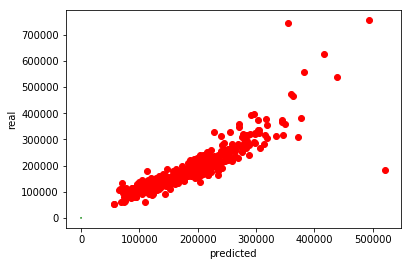

In [32]:
print("***Linear Regression...***")
reg=LinearRegression()
reg.fit(X_train,Y_train)    
reg_tsc=reg.score(X_train, Y_train)
print("Training accuracy:",reg_tsc*100,"%")
reg_sc=reg.score(X_test,Y_test)
print("Regression score:",reg_sc*100,"%")
test_price=reg.predict(X_test)
print("Predicted price for test data",test_price)
mse=np.sqrt(mean_squared_error(Y_test, test_price))
print("rmse",mse)
# Plot outputs
plt.plot(test_price, Y_test,'ro')
plt.plot([0,50],[0,50], 'g-')
plt.xlabel('predicted')
plt.ylabel('real')
plt.show()


***SGD Regressor...***
Training accuracy: 65.61957820507357 %
Regression score: 48.7631063787527 %
Predicted price for test data [172702.27460781 192928.25015447 138582.90079233 202988.27145581
 141072.48895171 189009.58955425 153059.57623805 146276.47601068
 154555.23646017 145205.3729683  192845.20846712 120100.97596263
 189534.66966189 132956.87775207 104627.86314841 158247.06483569
 182554.68034866 205153.99792511 167136.84221528 122430.05847378
 179706.9589432  128844.06151846 210571.57361485 127645.67623924
 139918.76321311 124139.47164473 126698.10570453 193807.88656448
 254806.79357601 189595.6139248  308260.38828065 208068.84764309
 172806.34008711 142646.35982062 152247.99673897 206193.53378178
 288025.50914272 154602.267637   158479.63678926 178127.47428665
 165106.26978285 106715.80700753 159619.45796824 209608.22810052
 308185.03424077 140490.46979095 195892.65533231 267623.88890628
 168170.80424933 185942.02391868 138261.85641967 122583.92605215
 186819.80652957 219587.16

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


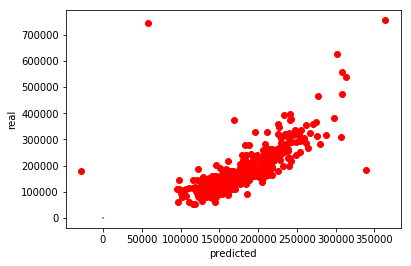

In [28]:
print("***SGD Regressor...***")
reg1=SGDRegressor(loss="squared_loss",penalty=None)
reg1.fit(X_train,Y_train) 
reg_tsc=reg1.score(X_train, Y_train)
print("Training accuracy:",reg_tsc*100,"%")
reg_sc=reg1.score(X_test,Y_test)
print("Regression score:",reg_sc*100,"%")
test_price=reg1.predict(X_test)
print("Predicted price for test data",test_price)
mse=np.sqrt(mean_squared_error(Y_test, test_price))
print("rmse",mse)
# Plot outputs
plt.plot(test_price, Y_test,'ro')
plt.plot([0,50],[0,50], 'g-')
plt.xlabel('predicted')
plt.ylabel('real')
plt.show()

***Random Forest Regressor...***
Training accuracy: 86.41498682885906 %
Regression score: 79.27577430318453 %
Predicted price for test data [174814.94693045 194027.06322923 115036.4580447  244956.62104369
 129148.93056607 212063.55008583 138277.16649019 126282.14237188
 143587.69471991 143788.81216518 188345.57428669  84914.5406662
 171018.08802553 120703.37423661  61095.48861583 140879.76496865
 277858.75005301 198150.61378048 143024.84557114  72593.41114762
 191308.69511972 137314.7087553  197246.45199101 103828.81590963
  82308.58834371  85102.20604832 137508.73399511 195543.76674664
 305166.50054904 192893.08063979 389566.80840533 223139.24326611
 202346.97501992 133233.89123575 138034.4567616  249467.40443729
 354078.52617081 151678.78381851 159404.46765632 168281.48800765
 131300.1380476   61965.60523102 125355.22804967 227914.37437625
 371417.91106953 118928.70700615 202267.64509157 311484.86106215
 172463.01138228 137470.10657347 104021.90394804  78737.21322554
 182216.91680653

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


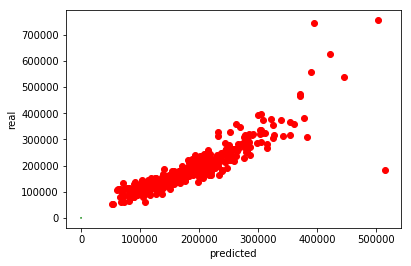

In [29]:
print("***Random Forest Regressor...***")
reg2=SGDRegressor(loss="squared_loss",penalty=None)
reg2.fit(X_train,Y_train) 
reg_tsc=reg2.score(X_train, Y_train)
print("Training accuracy:",reg_tsc*100,"%")
reg_sc=reg2.score(X_test,Y_test)
print("Regression score:",reg_sc*100,"%")
test_price=reg2.predict(X_test)
print("Predicted price for test data",test_price)
mse=np.sqrt(mean_squared_error(Y_test, test_price))
print("rmse",mse)
# Plot outputs
plt.plot(test_price, Y_test,'ro')
plt.plot([0,50],[0,50], 'g-')
plt.xlabel('predicted')
plt.ylabel('real')
plt.show()


In [30]:
#Best model so far is SGD Regressor